In [140]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

Матрица смежности из пз 1-2

In [141]:
matrix = [
[0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
]

<h5> 1. Превратить граф из ПЗ1-2 во взвешенный, веса - целые числа, распределенные случайным образом</h5>

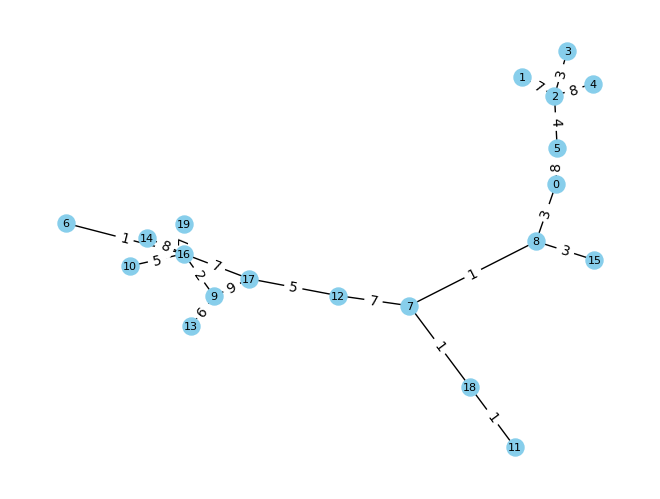

In [142]:
G = nx.Graph()

for i in range(len(matrix)):
    for j in range(len(matrix[i])):
        if matrix[i][j] == 1:
            weight = np.random.randint(1, 10)
            G.add_edge(i, j, weight=weight)

pos = nx.spring_layout(G)
edge_labels = {(i, j): G[i][j]['weight'] for i, j in G.edges()}

nx.draw(G, pos, with_labels=True, node_size=150, node_color='skyblue', font_size=8)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()


<h5>2. Выполнить поиск минимального пути из вершины А в Б (А и Б задаются пользователем) поиском в ширину и в глубину, сделать выводы какой поиск эффективнее. Вывести маршрут и его вес</h5>

In [153]:
def shortest_path(graph, start, end):
        path = nx.shortest_path(graph, source=start, target=end, weight='weight')
        length = nx.shortest_path_length(graph, source=start, target=end, weight='weight')
        return path, length

start_node = int(input("Введите вершину А: "))
end_node = int(input("Введите вершину Б: "))

path, length = shortest_path(G, start_node, end_node)
print(f"\nМинимальный путь поиска в глубину: {path}")
print(f"Вес: {length}")


Минимальный путь поиска в глубину: [5, 10]
Вес: 1


В библиотеке NetworkX для Python поиск кратчайшего пути осуществляется методом поиска в ширину (BFS) при использовании функций shortest_path и shortest_path_length. Эти функции находят кратчайший путь между двумя узлами в графе, учитывая веса ребер, если граф взвешен. Очевидно, что данный способ эффективней поиска в глубину (DFS), для которого есть необходимость написания отдельного метода.

<h5>3. Выполнить поиск всех путей из А в Б, вывести маршруты и их веса</h5>

In [152]:
def find_all_paths(graph, start, end):
    all_paths = list(nx.all_simple_paths(graph, source=start, target=end))
    return all_paths

def sum(graph, path):
    cost = 0
    for i in range(len(path) - 1):
        cost += graph[path[i]][path[i+1]]['weight']
    return cost

start_node = int(input("Введите вершину А: "))
end_node = int(input("Введите вершину Б: "))

all_paths = find_all_paths(G, start_node, end_node)

for path in all_paths:
    path_cost = sum(G, path)
    print(f"Путь: {path}, Вес: {path_cost}")

Путь: [5, 3, 1, 2, 10], Вес: 11
Путь: [5, 10], Вес: 1


<h5>4. Пользуясь сервисом https://programforyou.ru/graph-redactor построить сетевой граф из 20 вершин и проделать п 1-3</h5>

Сетевой граф с сервиса Program4you:

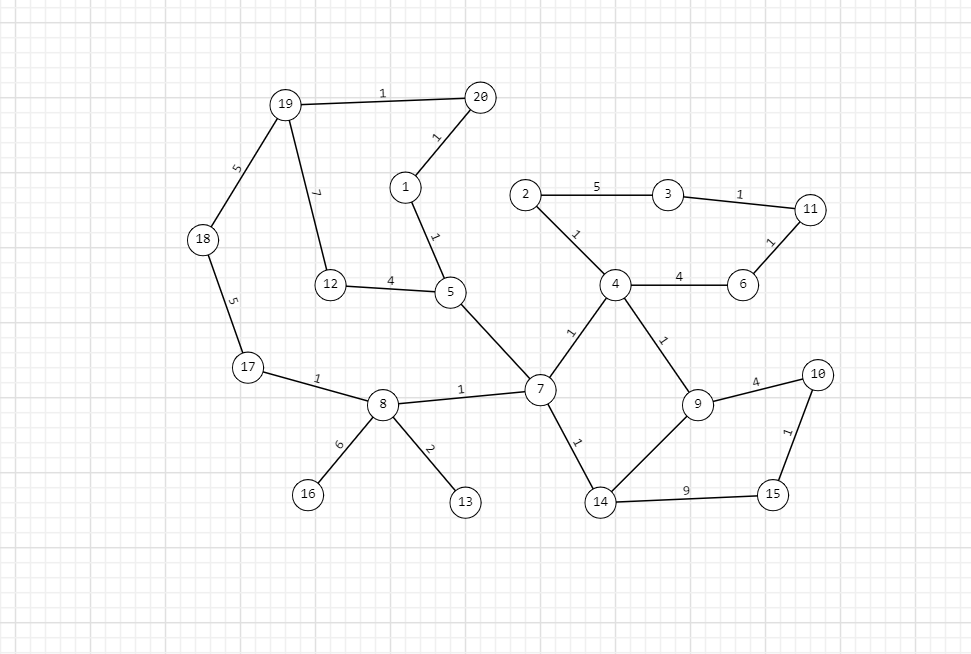

Импортируем матрицу смежности из сервиса:

In [145]:
matrix=[
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
[0, 0, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 4, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 6, 1, 0, 0, 0],
[0, 0, 0, 1, 0, 0, 0, 0, 0, 4, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0],
[0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 5, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 5, 0, 1],
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
]

Взвешенный граф с помощью Networx:

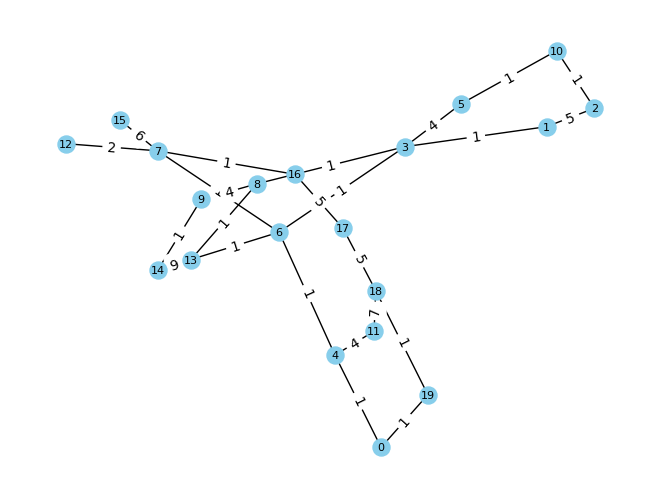

In [148]:
G = nx.Graph()
for i in range(len(matrix)):
    for j in range(len(matrix[i])):
        if matrix[i][j] != 0:
            weight = matrix[i][j]
            G.add_edge(i, j, weight=weight)

pos = nx.spring_layout(G)
edge_labels = {(i, j): G[i][j]['weight'] for i, j in G.edges()}

nx.draw(G, pos, with_labels=True, node_size=150, node_color='skyblue', font_size=8)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()

Поиск кратчайшего пути из А в Б:

In [149]:
start_node = int(input("Введите вершину А: "))
end_node = int(input("Введите вершину Б: "))

path, length = shortest_path(G, start_node, end_node)
print(f"\nМинимальный путь поиска в глубину: {path}")
print(f"Вес: {length}")


Минимальный путь поиска в глубину: [4, 6, 3, 5, 10]
Вес: 7


Поиск всех путей из А в Б:

In [151]:
start_node = int(input("Введите вершину А: "))
end_node = int(input("Введите вершину Б: "))

all_paths = find_all_paths(G, start_node, end_node)

for path in all_paths:
    path_cost = sum(G, path)
    print(f"Путь: {path}, Вес: {path_cost}")

Путь: [4, 0, 19, 18, 17, 16, 7, 6, 3, 1, 2, 10], Вес: 23
Путь: [4, 0, 19, 18, 17, 16, 7, 6, 3, 5, 10], Вес: 21
Путь: [4, 0, 19, 18, 17, 16, 7, 6, 13, 8, 3, 1, 2, 10], Вес: 25
Путь: [4, 0, 19, 18, 17, 16, 7, 6, 13, 8, 3, 5, 10], Вес: 23
Путь: [4, 0, 19, 18, 17, 16, 7, 6, 13, 14, 9, 8, 3, 1, 2, 10], Вес: 38
Путь: [4, 0, 19, 18, 17, 16, 7, 6, 13, 14, 9, 8, 3, 5, 10], Вес: 36
Путь: [4, 6, 3, 1, 2, 10], Вес: 9
Путь: [4, 6, 3, 5, 10], Вес: 7
Путь: [4, 6, 13, 8, 3, 1, 2, 10], Вес: 11
Путь: [4, 6, 13, 8, 3, 5, 10], Вес: 9
Путь: [4, 6, 13, 14, 9, 8, 3, 1, 2, 10], Вес: 24
Путь: [4, 6, 13, 14, 9, 8, 3, 5, 10], Вес: 22
Путь: [4, 11, 18, 17, 16, 7, 6, 3, 1, 2, 10], Вес: 31
Путь: [4, 11, 18, 17, 16, 7, 6, 3, 5, 10], Вес: 29
Путь: [4, 11, 18, 17, 16, 7, 6, 13, 8, 3, 1, 2, 10], Вес: 33
Путь: [4, 11, 18, 17, 16, 7, 6, 13, 8, 3, 5, 10], Вес: 31
Путь: [4, 11, 18, 17, 16, 7, 6, 13, 14, 9, 8, 3, 1, 2, 10], Вес: 46
Путь: [4, 11, 18, 17, 16, 7, 6, 13, 14, 9, 8, 3, 5, 10], Вес: 44
